In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
base = pd.read_csv('dataset.csv')
base.isna().sum()
base.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
base.head()
base['Admitted'] = [1 if chance > 0.8 else 0 for chance in base['Chance of Admit ']]
base.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


Text(0.5,1,'Admitted students')

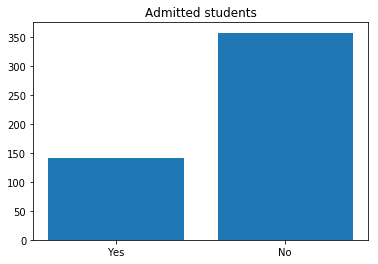

In [8]:
labels = ['Yes', 'No']
x_pos = [0, 1]

admitted = len(base[base['Admitted'] == 1])
not_admitted = len(base[base['Admitted'] == 0])

plt.bar(x_pos, [admitted, not_admitted])
plt.xticks(x_pos, labels)
plt.title('Admitted students')

In [11]:
toefl = base.iloc[:, 2].values
gre   = base.iloc[:, 1].values
cgpa  = base.iloc[:, 6].values

x = pd.DataFrame(np.c_[toefl, gre, cgpa], columns=['toefl','gre', 'cgpa'])
y = base.iloc[:, -1].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

Text(0.5,15,'Predicted label')

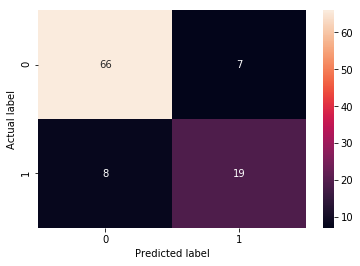

In [15]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cnf_matrix, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [17]:
print(metrics.classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.89      0.90      0.90        73
          1       0.73      0.70      0.72        27

avg / total       0.85      0.85      0.85       100



In [18]:
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print("Precision: ", metrics.precision_score(y_test, predictions))
print("Recall: ", metrics.recall_score(y_test, predictions))

Accuracy:  0.85
Precision:  0.730769230769
Recall:  0.703703703704
